In [334]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [335]:
pd.options.display.float_format = '{:.4f}'.format

In [336]:
df=pd.read_csv("Forbes Billionaires.csv")

In [337]:
df.columns

Index(['Rank ', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')

In [338]:
df["Industry"].unique()

array(['Automotive ', 'Technology ', 'Fashion & Retail ',
       'Finance & Investments ', 'diversified   ',
       'Media & Entertainment ', 'Telecom ', 'Food & Beverage ',
       'Logistics ', 'Real Estate ', 'Metals & Mining ', 'Manufacturing ',
       'Gambling & Casinos ', 'Healthcare ', 'Service ', 'Energy ',
       'Construction & Engineering ', 'Sports '], dtype=object)

In [339]:
#strip whitespace
df['Industry'] = df['Industry'].str.replace(" ", "")
df["Industry"].unique()
df.columns=df.columns.str.replace(" ","")
df.columns

Index(['Rank', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')

In [340]:
df.describe()

,Rank,Networth,Age
count,2600.0000,2600.0000,2600.0000
mean,1269.5708,4.8608,64.2719
std,728.1464,10.6597,13.2206
min,1.0000,1.0000,19.0000
25%,637.0000,1.5000,55.0000
50%,1292.0000,2.4000,64.0000
75%,1929.0000,4.5000,74.0000
max,2578.0000,219.0000,100.0000


In [341]:
df.isna().sum()
#We have no NA's in our dataset
df.columns

Index(['Rank', 'Name', 'Networth', 'Age', 'Country', 'Source', 'Industry'], dtype='object')

In [342]:
dfagg=df.groupby("Industry").agg(
    mean_networth=pd.NamedAgg(column="Networth", aggfunc="mean"),
    count_networth=pd.NamedAgg(column="Networth", aggfunc="count"),
    std_networth=pd.NamedAgg(column="Networth", aggfunc="std"),
    min_rank=pd.NamedAgg(column="Rank",aggfunc="min"),
    max_rank=pd.NamedAgg(column="Rank",aggfunc="max")
)
dfagg

,mean_networth,count_networth,std_networth,min_rank,max_rank
Industry,,,,,
Automotive,8.4435,69,26.7533,1,2448
Construction&Engineering,2.8116,43,2.6738,125,2448
Energy,4.2505,93,3.7238,88,2448
Fashion&Retail,6.5577,246,14.7106,3,2578
Finance&Investments,4.4930,386,7.9063,5,2578
Food&Beverage,4.6435,201,6.8139,17,2578
Gambling&Casinos,4.6783,23,5.5232,50,2190
Healthcare,3.3439,212,3.5942,56,2578
Logistics,5.6057,35,9.0154,31,2324


In [343]:
dfagg.sort_values(by="mean_networth",ascending=False)

,mean_networth,count_networth,std_networth,min_rank,max_rank
Industry,,,,,
Automotive,8.4435,69,26.7533,1,2448
Technology,6.5909,329,17.0843,2,2578
Fashion&Retail,6.5577,246,14.7106,3,2578
Telecom,5.8600,35,13.7164,13,2578
Metals&Mining,5.8164,67,7.0263,45,2448
Logistics,5.6057,35,9.0154,31,2324
diversified,5.2781,178,11.6897,10,2448
Media&Entertainment,5.1958,95,10.7926,12,2448
Gambling&Casinos,4.6783,23,5.5232,50,2190


The highest average worth is found in the Automotive industry, whereas the lowest mean worth is in Construction and 
engineering. Most billionaires are in the Finance & Investments industry, followed by the Technology and Manufacturing industries. 

In [344]:
dfagg["worth_mean_ratio"]=dfagg['mean_networth']/df["Networth"].mean()
dfagg["worth_std_ratio"]=dfagg['std_networth']/df["Networth"].std()
dfagg.sort_values(by="worth_mean_ratio",ascending=False)

,mean_networth,count_networth,std_networth,min_rank,max_rank,worth_mean_ratio,worth_std_ratio
Industry,,,,,,,
Automotive,8.4435,69,26.7533,1,2448,1.7371,2.5098
Technology,6.5909,329,17.0843,2,2578,1.3559,1.6027
Fashion&Retail,6.5577,246,14.7106,3,2578,1.3491,1.3800
Telecom,5.8600,35,13.7164,13,2578,1.2056,1.2868
Metals&Mining,5.8164,67,7.0263,45,2448,1.1966,0.6592
Logistics,5.6057,35,9.0154,31,2324,1.1533,0.8457
diversified,5.2781,178,11.6897,10,2448,1.0859,1.0966
Media&Entertainment,5.1958,95,10.7926,12,2448,1.0689,1.0125
Gambling&Casinos,4.6783,23,5.5232,50,2190,0.9625,0.5181


By comparing the means and standard deviations of each Industry against the overall mean and standard deviation we can see that there is an overall trend of increasing volatility as the mean net worth increaces

<AxesSubplot:xlabel='worth_mean_ratio', ylabel='worth_std_ratio'>

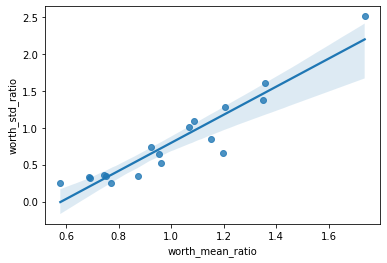

In [345]:
sns.regplot(x="worth_mean_ratio",y="worth_std_ratio",data=dfagg)

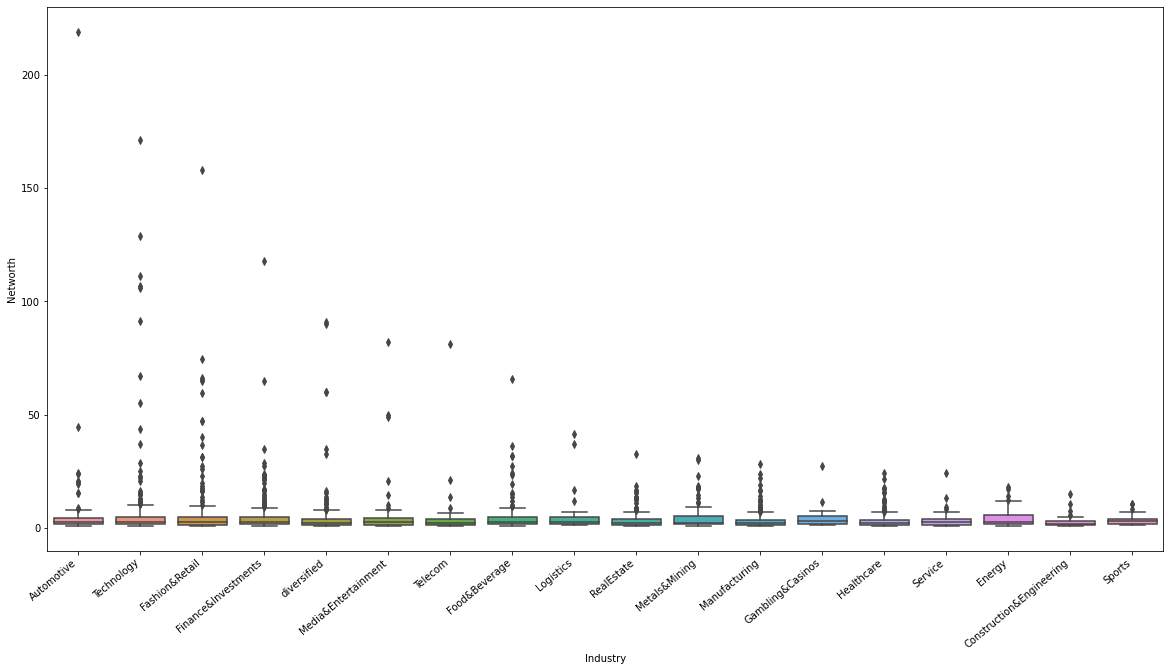

In [346]:
plt.figure(figsize=(20, 10))
ax=sns.boxplot(x = "Industry",
            y = "Networth",
            data = df)


ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

# Overall distirbution of net worth

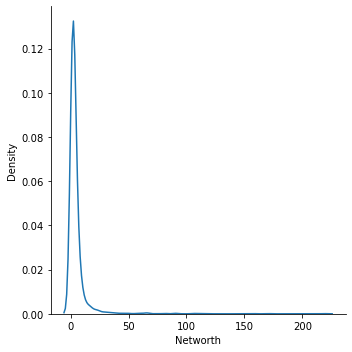

In [347]:
sns.displot(df, x="Networth", kind="kde")

The overall distirbution of net worth is heavily skewed to the right with a long tail

<AxesSubplot:ylabel='Networth'>

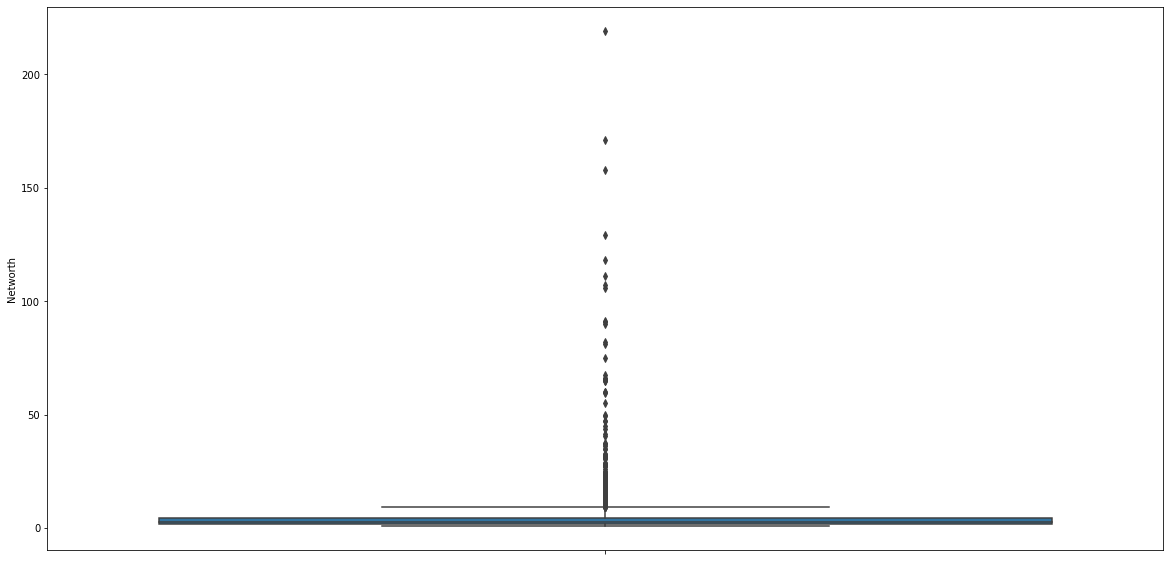

In [348]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df,y="Networth")

<AxesSubplot:xlabel='Networth', ylabel='Count'>

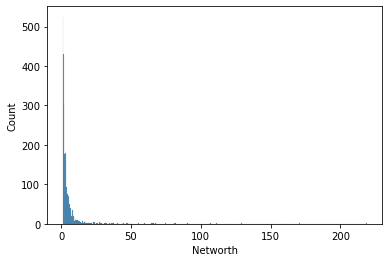

In [349]:
sns.histplot(df, x="Networth")

<AxesSubplot:xlabel='Networth', ylabel='Proportion'>

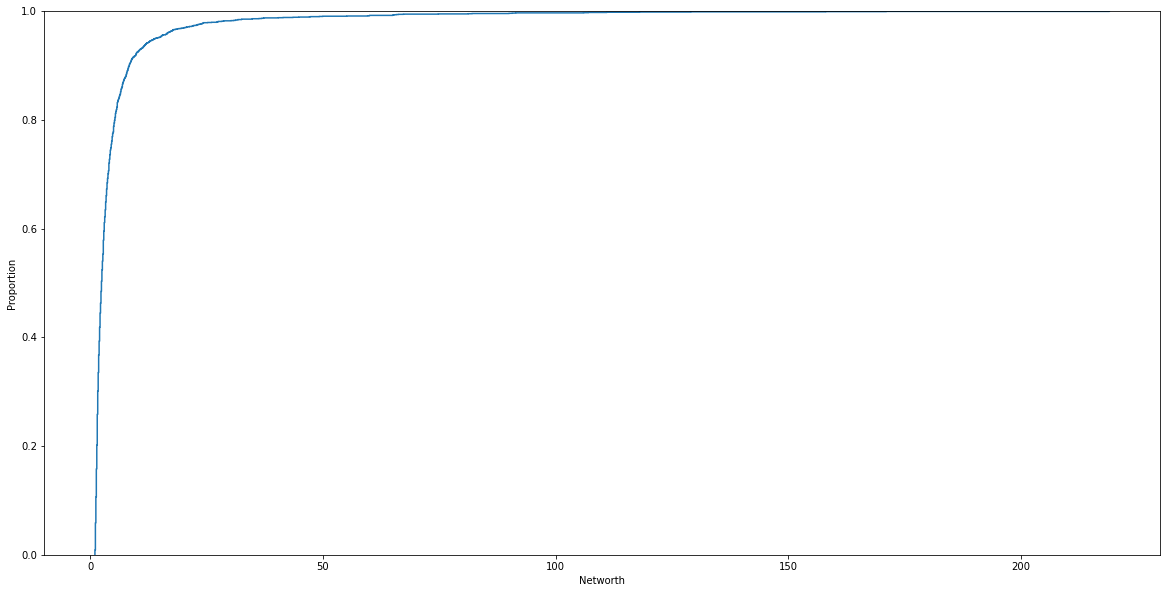

In [350]:
plt.figure(figsize=(20, 10))
sns.ecdfplot(df, x="Networth")

In [351]:
df["cumperc"]=(df["Networth"].cumsum()/df["Networth"].sum())
df["worthratio"]=(df["Networth"]/df["Networth"].sum())
df.sort_values("worthratio",ascending=False)

,Rank,Name,Networth,Age,Country,Source,Industry,cumperc,worthratio
0,1,Elon Musk,219.0000,50,United States,"Tesla, SpaceX",Automotive,0.0173,0.0173
1,2,Jeff Bezos,171.0000,58,United States,Amazon,Technology,0.0309,0.0135
2,3,Bernard Arnault & family,158.0000,73,France,LVMH,Fashion&Retail,0.0434,0.0125
3,4,Bill Gates,129.0000,66,United States,Microsoft,Technology,0.0536,0.0102
4,5,Warren Buffett,118.0000,91,United States,Berkshire Hathaway,Finance&Investments,0.0629,0.0093
...,...,...,...,...,...,...,...,...,...
2580,2578,Karl Friedrich Braun,1.0000,39,Germany,medical technology,Healthcare,0.9985,0.0001
2579,2578,Johanna Braun,1.0000,42,Germany,medical technology,Healthcare,0.9984,0.0001
2578,2578,"Wilbur 'Ed' Bosarge, Jr.",1.0000,82,United States,high speed trading,Finance&Investments,0.9983,0.0001
2577,2578,Krishna Kumar Bangur,1.0000,61,India,graphite electrodes,Manufacturing,0.9983,0.0001


In [352]:
df.loc[df["cumperc"]>0.5,]

,Rank,Name,Networth,Age,Country,Source,Industry,cumperc,worthratio
287,288,Christopher Hohn,7.9000,55,United Kingdom,hedge funds,Finance&Investments,0.5005,0.0006
288,288,Marijke Mars,7.9000,57,United States,"candy, pet food",Food&Beverage,0.5011,0.0006
289,288,Pamela Mars,7.9000,61,United States,"candy, pet food",Food&Beverage,0.5018,0.0006
290,288,Valerie Mars,7.9000,63,United States,"candy, pet food",Food&Beverage,0.5024,0.0006
291,288,Victoria Mars,7.9000,65,United States,"candy, pet food",Food&Beverage,0.5030,0.0006
...,...,...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,1.0000,80,Spain,pharmaceuticals,Healthcare,0.9997,0.0001
2596,2578,Nari Genomal,1.0000,82,Philippines,apparel,Fashion&Retail,0.9998,0.0001
2597,2578,Ramesh Genomal,1.0000,71,Philippines,apparel,Fashion&Retail,0.9998,0.0001
2598,2578,Sunder Genomal,1.0000,68,Philippines,garments,Fashion&Retail,0.9999,0.0001


Out of 2599 billionaires, 287 account for 50% of the total networth. Thus 11% of billionaires account for 50% of the total networth in our dataset.

# Networth Distirbutions by Industry

<AxesSubplot:xlabel='Networth', ylabel='Proportion'>

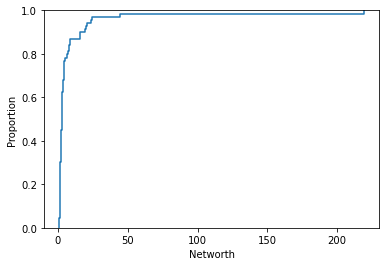

In [353]:
sns.ecdfplot(x="Networth",data=df.loc[df["Industry"]=="Automotive",])

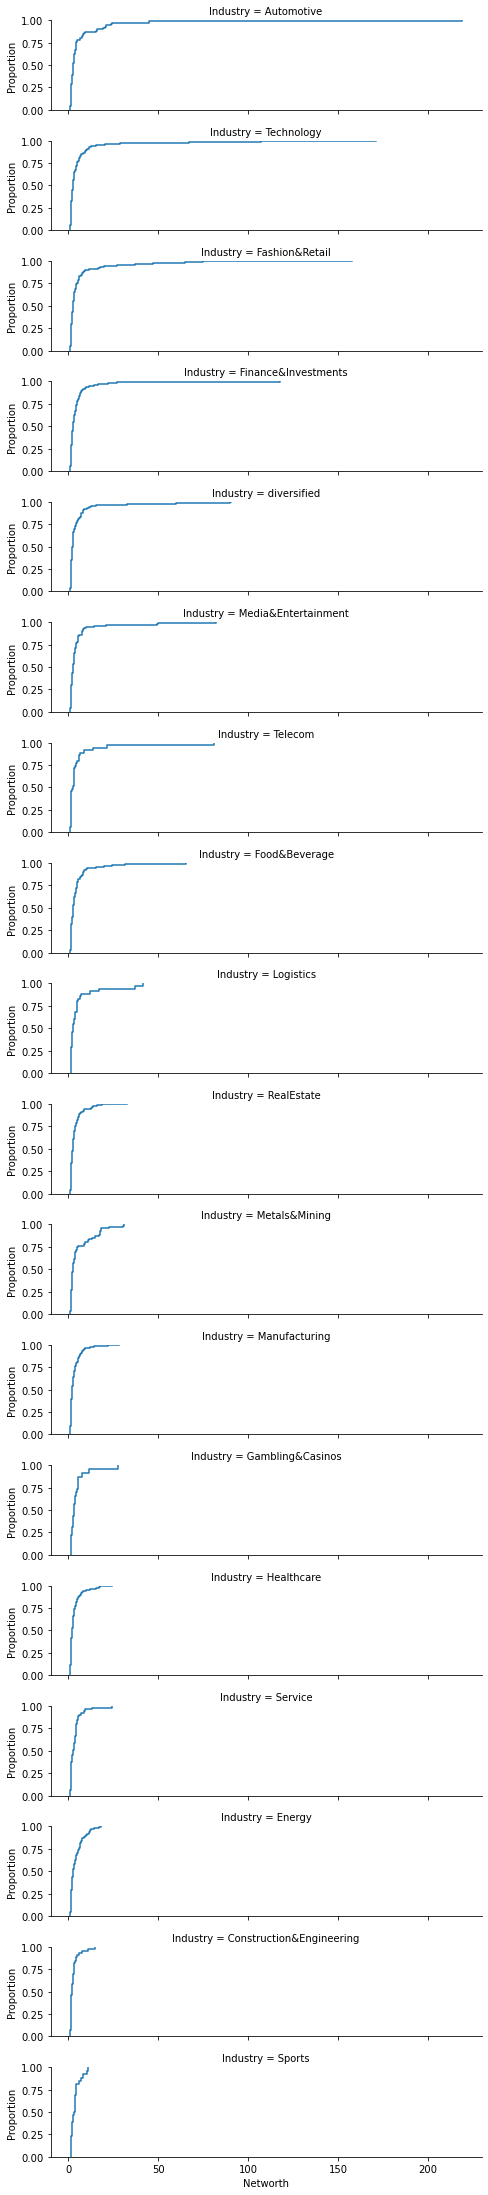

In [354]:
plotgrid = sns.FacetGrid(df, row="Industry",height=1.7, aspect=4)
plotgrid.map(sns.ecdfplot, "Networth")

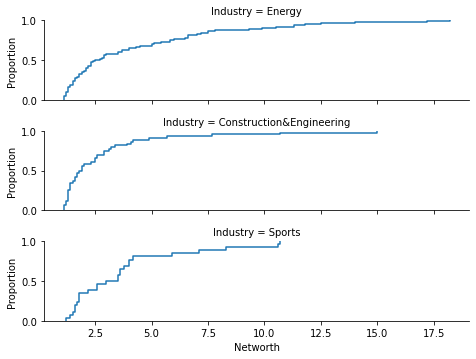

In [355]:
cond=["Energy","Construction&Engineering","Sports"]

plotgrid = sns.FacetGrid(df.loc[df["Industry"].isin(cond)], row="Industry",height=1.7, aspect=4)
plotgrid.map(sns.ecdfplot, "Networth")

<AxesSubplot:xlabel='Networth', ylabel='Proportion'>

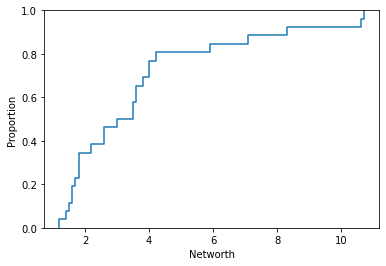

In [356]:
sns.ecdfplot(x="Networth",data=df.loc[df["Industry"]=="Sports"])

<AxesSubplot:xlabel='Networth', ylabel='Count'>

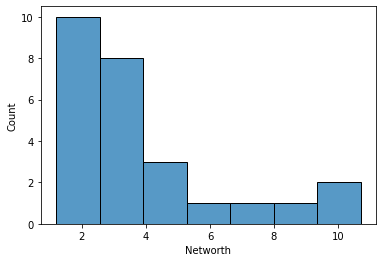

In [357]:
sns.histplot(x="Networth",data=df.loc[df["Industry"]=="Sports"])

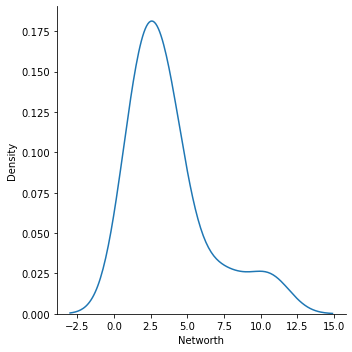

In [358]:
sns.displot(x="Networth",data=df.loc[df["Industry"]=="Sports"],kind="kde")

The right skewed distirbution holds for all industries in differing levels of skewness. The most diversified distirbution is found in the sports industry. It is highly propable that if we had more data on billionaires of the Sports Industry the above finding would change and the aforementionded cumulative distirbution would align with the overall finding of fat tailed distirbutions of net worth.

# Net worth Distirbution by Country

In [359]:
dfagg=df.groupby("Country").agg(
    mean_networth=pd.NamedAgg(column="Networth", aggfunc="mean"),
    count_networth=pd.NamedAgg(column="Networth", aggfunc="count"),
    std_networth=pd.NamedAgg(column="Networth", aggfunc="std"),
    total=pd.NamedAgg(column="Networth",aggfunc="sum"),
    min_rank=pd.NamedAgg(column="Rank",aggfunc="min"),
    max_rank=pd.NamedAgg(column="Rank",aggfunc="max")
)
dfagg.sort_values("mean_networth",ascending=False)

,mean_networth,count_networth,std_networth,total,min_rank,max_rank
Country,,,,,,
France,12.7907,43,26.8270,550.0000,3,2578
Mexico,10.7267,15,20.9049,160.9000,13,2324
Nigeria,9.4000,3,3.9887,28.2000,130,350
Denmark,7.0000,8,4.0824,56.0000,135,2448
United States,6.5161,719,16.0853,4685.1000,1,2578
...,...,...,...,...,...,...
Tanzania,1.5000,1,NaN,1.5000,1929,1929
Uruguay,1.5000,2,0.0000,3.0000,1929,1929
Nepal,1.5000,1,NaN,1.5000,1929,1929


In [360]:
dfagg.sort_values("total",ascending=False)

,mean_networth,count_networth,std_networth,total,min_rank,max_rank
Country,,,,,,
United States,6.5161,719,16.0853,4685.1000,1,2578
China,3.7640,515,5.4817,1938.4500,17,2578
India,4.6261,161,10.5262,744.8000,10,2578
Germany,4.6462,130,6.7541,604.0000,28,2578
France,12.7907,43,26.8270,550.0000,3,2578
...,...,...,...,...,...,...
Barbados,1.7000,1,NaN,1.7000,1729,1729
Tanzania,1.5000,1,NaN,1.5000,1929,1929
St. Kitts and Nevis,1.5000,1,NaN,1.5000,1929,1929


Most billionaires are found in the USA, followed by China. The net worth per capita is highest in France, followed by Mexico